In [1]:
import torch
from pathlib import Path
import os

In [2]:
from src.preprocessing import preprocess_data

In [3]:
data_path = Path("data_augmented_2")
preprocess_data.walk_through_dir(data_path)

There are 2 directories and 0 images in 'data_augmented_2'.
There are 4 directories and 0 images in 'data_augmented_2\Test_300x300'.
There are 0 directories and 13 images in 'data_augmented_2\Test_300x300\1'.
There are 0 directories and 23 images in 'data_augmented_2\Test_300x300\2'.
There are 0 directories and 50 images in 'data_augmented_2\Test_300x300\3'.
There are 0 directories and 9 images in 'data_augmented_2\Test_300x300\4'.
There are 4 directories and 0 images in 'data_augmented_2\Train_300x300'.
There are 0 directories and 1488 images in 'data_augmented_2\Train_300x300\1'.
There are 0 directories and 1290 images in 'data_augmented_2\Train_300x300\2'.
There are 0 directories and 1350 images in 'data_augmented_2\Train_300x300\3'.
There are 0 directories and 1350 images in 'data_augmented_2\Train_300x300\4'.


In [4]:
# data augmentation
from src.preprocessing.preprocess_data import augment_data_2

# augment_data_2()

In [5]:
for cl in ['1','2','3','4']:
    fs = os.listdir(Path("data_augmented")/"Train_300x300"/cl)
    print(f"{cl} - {len(fs)} Samples")

1 - 496 Samples
2 - 430 Samples
3 - 450 Samples
4 - 450 Samples


### information on data annotation
1 - Good ;
2 - Fair ;
3 - Poor ;
4 - Severe ;

In [6]:
# total Test images -> 13+23+50+9 = 95
# Total Train images -> 124+215+450+90 = 879

In [7]:
#setting up the loss functions and optimizers
from torch import nn
from src.models.models import train_model
from src.models.models import get_efficientnet_b0_model
from src.preprocessing.transforms_data import data_transformations
from pathlib import Path
import torch

model_b0_adam, model_b0_transforms = get_efficientnet_b0_model()

train_dir = Path("data_augmented_2") / "Train_300x300"
test_dir = Path("data_augmented_2") / "Test_300x300"
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b0_transforms)
train_dataloader, valid_dataloader, test_dataloader_b0 = data.get_dataloaders()

weights = data.get_class_weights_inverse_train()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
optimizer = torch.optim.Adam(params=model_b0_adam.parameters(),lr=0.001, weight_decay=1e-4)
model_name = "efficientnet_b0"
optimizer_name = "Adam"
results_1= train_model(model_b0_adam, loss_fn, optimizer, train_dataloader, valid_dataloader, device,experiment_name=f'{model_name}_{optimizer_name}', epochs=10)

Epoch: 0 | Train accuracy: 0.7564 | Train Loss: 0.6231 | Train F1 Score Weighted: 0.752 | Valid accuracy: 0.9124 | Valid Loss: 0.2766 | Valid F1 Score Weighted: 0.909
Epoch: 1 | Train accuracy: 0.9245 | Train Loss: 0.2272 | Train F1 Score Weighted: 0.923 | Valid accuracy: 0.9580 | Valid Loss: 0.1122 | Valid F1 Score Weighted: 0.957
Epoch: 2 | Train accuracy: 0.9606 | Train Loss: 0.1201 | Train F1 Score Weighted: 0.960 | Valid accuracy: 0.9653 | Valid Loss: 0.1141 | Valid F1 Score Weighted: 0.964
Epoch: 3 | Train accuracy: 0.9611 | Train Loss: 0.1108 | Train F1 Score Weighted: 0.960 | Valid accuracy: 0.9580 | Valid Loss: 0.1117 | Valid F1 Score Weighted: 0.956
Epoch: 4 | Train accuracy: 0.9746 | Train Loss: 0.0849 | Train F1 Score Weighted: 0.974 | Valid accuracy: 0.9781 | Valid Loss: 0.0656 | Valid F1 Score Weighted: 0.978
Epoch: 5 | Train accuracy: 0.9769 | Train Loss: 0.0950 | Train F1 Score Weighted: 0.977 | Valid accuracy: 0.9745 | Valid Loss: 0.0566 | Valid F1 Score Weighted: 0.97

In [8]:
#setting up the loss functions and optimizers
from torch import nn
from src.models.models import train_model
from src.models.models import get_efficientnet_b0_model
from src.preprocessing.transforms_data import data_transformations
from pathlib import Path
import torch

model_b0_sgd, model_b0_transforms = get_efficientnet_b0_model()

train_dir = Path("data_augmented_2") / "Train_300x300"
test_dir = Path("data_augmented_2") / "Test_300x300"
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b0_transforms)
train_dataloader, valid_dataloader, test_dataloader_b0 = data.get_dataloaders()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
weights = data.get_class_weights_inverse_train()
loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
optimizer = torch.optim.SGD(params=model_b0_sgd.parameters(),lr=0.1, weight_decay=1e-4)
model_name = "efficientnet_b0"
optimizer_name = "SGD"
results_1 = train_model(model_b0_sgd, loss_fn, optimizer, train_dataloader, valid_dataloader, device,experiment_name=f'{model_name}_{optimizer_name}', epochs=10)

Epoch: 0 | Train accuracy: 0.6704 | Train Loss: 0.7924 | Train F1 Score Weighted: 0.665 | Valid accuracy: 0.7555 | Valid Loss: 0.5976 | Valid F1 Score Weighted: 0.729
Epoch: 1 | Train accuracy: 0.8432 | Train Loss: 0.4377 | Train F1 Score Weighted: 0.841 | Valid accuracy: 0.8540 | Valid Loss: 0.4201 | Valid F1 Score Weighted: 0.844
Epoch: 2 | Train accuracy: 0.9144 | Train Loss: 0.2437 | Train F1 Score Weighted: 0.913 | Valid accuracy: 0.9489 | Valid Loss: 0.1624 | Valid F1 Score Weighted: 0.945
Epoch: 3 | Train accuracy: 0.9483 | Train Loss: 0.1569 | Train F1 Score Weighted: 0.947 | Valid accuracy: 0.8613 | Valid Loss: 0.5347 | Valid F1 Score Weighted: 0.856
Epoch: 4 | Train accuracy: 0.9606 | Train Loss: 0.1331 | Train F1 Score Weighted: 0.960 | Valid accuracy: 0.8540 | Valid Loss: 0.5167 | Valid F1 Score Weighted: 0.851
Epoch: 5 | Train accuracy: 0.9560 | Train Loss: 0.1333 | Train F1 Score Weighted: 0.956 | Valid accuracy: 0.9453 | Valid Loss: 0.1595 | Valid F1 Score Weighted: 0.94

In [9]:
#setting up the loss functions and optimizers
from torch import nn
from src.models.models import train_model
from src.models.models import get_efficientnet_b1_model
from src.preprocessing.transforms_data import data_transformations
from pathlib import Path
import torch

model_b1_adam, model_b1_transforms = get_efficientnet_b1_model()

train_dir = Path("data_augmented_2") / "Train_300x300"
test_dir = Path("data_augmented_2") / "Test_300x300"
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b1_transforms)
train_dataloader, valid_dataloader, test_dataloader_b1 = data.get_dataloaders()

weights = data.get_class_weights_inverse_train()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
optimizer = torch.optim.Adam(params=model_b1_adam.parameters(),lr=0.001, weight_decay=1e-4)

model_name = "efficientnet_b1"
optimizer_name = "Adam"
results_1 = train_model(model_b1_adam, loss_fn, optimizer, train_dataloader, valid_dataloader, device,experiment_name=f'{model_name}_{optimizer_name}', epochs=10)

Epoch: 0 | Train accuracy: 0.7379 | Train Loss: 0.6666 | Train F1 Score Weighted: 0.734 | Valid accuracy: 0.8960 | Valid Loss: 0.3013 | Valid F1 Score Weighted: 0.892
Epoch: 1 | Train accuracy: 0.8996 | Train Loss: 0.2763 | Train F1 Score Weighted: 0.899 | Valid accuracy: 0.9507 | Valid Loss: 0.1881 | Valid F1 Score Weighted: 0.947
Epoch: 2 | Train accuracy: 0.9477 | Train Loss: 0.1668 | Train F1 Score Weighted: 0.947 | Valid accuracy: 0.9708 | Valid Loss: 0.1183 | Valid F1 Score Weighted: 0.969
Epoch: 3 | Train accuracy: 0.9546 | Train Loss: 0.1299 | Train F1 Score Weighted: 0.954 | Valid accuracy: 0.9799 | Valid Loss: 0.0771 | Valid F1 Score Weighted: 0.978
Epoch: 4 | Train accuracy: 0.9696 | Train Loss: 0.0951 | Train F1 Score Weighted: 0.969 | Valid accuracy: 0.9745 | Valid Loss: 0.0684 | Valid F1 Score Weighted: 0.973
Epoch: 5 | Train accuracy: 0.9661 | Train Loss: 0.1251 | Train F1 Score Weighted: 0.966 | Valid accuracy: 0.9818 | Valid Loss: 0.0667 | Valid F1 Score Weighted: 0.98

In [10]:
#setting up the loss functions and optimizers
from torch import nn
from src.models.models import train_model
from src.models.models import get_efficientnet_b1_model
from src.preprocessing.transforms_data import data_transformations
from pathlib import Path
import torch

model_b1_sgd, model_b1_transforms = get_efficientnet_b1_model()

train_dir = Path("data_augmented_2") / "Train_300x300"
test_dir = Path("data_augmented_2") / "Test_300x300"
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b1_transforms)
train_dataloader, valid_dataloader, test_dataloader_b1 = data.get_dataloaders()

weights = data.get_class_weights_inverse_train()
loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
optimizer = torch.optim.SGD(params=model_b1_sgd.parameters(),lr=0.1, weight_decay=1e-4)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_name = "efficientnet_b1"
optimizer_name = "SGD"
results_1 = train_model(model_b1_sgd, loss_fn, optimizer, train_dataloader, valid_dataloader, device,experiment_name=f'{model_name}_{optimizer_name}', epochs=10)

Epoch: 0 | Train accuracy: 0.6150 | Train Loss: 0.9312 | Train F1 Score Weighted: 0.606 | Valid accuracy: 0.6405 | Valid Loss: 0.8823 | Valid F1 Score Weighted: 0.600
Epoch: 1 | Train accuracy: 0.7262 | Train Loss: 0.6696 | Train F1 Score Weighted: 0.721 | Valid accuracy: 0.7245 | Valid Loss: 0.6803 | Valid F1 Score Weighted: 0.706
Epoch: 2 | Train accuracy: 0.7974 | Train Loss: 0.5129 | Train F1 Score Weighted: 0.794 | Valid accuracy: 0.8759 | Valid Loss: 0.3915 | Valid F1 Score Weighted: 0.874
Epoch: 3 | Train accuracy: 0.8560 | Train Loss: 0.3946 | Train F1 Score Weighted: 0.853 | Valid accuracy: 0.8011 | Valid Loss: 0.5261 | Valid F1 Score Weighted: 0.779
Epoch: 4 | Train accuracy: 0.8915 | Train Loss: 0.3253 | Train F1 Score Weighted: 0.890 | Valid accuracy: 0.7810 | Valid Loss: 0.5482 | Valid F1 Score Weighted: 0.775
Epoch: 5 | Train accuracy: 0.9101 | Train Loss: 0.2663 | Train F1 Score Weighted: 0.908 | Valid accuracy: 0.9398 | Valid Loss: 0.1997 | Valid F1 Score Weighted: 0.93

In [11]:
#setting up the loss functions and optimizers
from torch import nn
from src.models.models import train_model
from src.models.models import get_efficientnet_b2_model
from src.preprocessing.transforms_data import data_transformations

model_b2_adam, model_b2_transforms = get_efficientnet_b2_model()

train_dir = Path("data_augmented_2") / "Train_300x300"
test_dir = Path("data_augmented_2") / "Test_300x300"
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b2_transforms)
train_dataloader, valid_dataloader, test_dataloader_b2 = data.get_dataloaders()

weights = data.get_class_weights_inverse_train()
loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
optimizer = torch.optim.Adam(params=model_b2_adam.parameters(),lr=0.001, weight_decay=1e-4)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_name = "efficientnet_b2"
optimizer_name = "Adam"
results_1 = train_model(model_b2_adam, loss_fn, optimizer, train_dataloader, valid_dataloader, device,experiment_name=f'{model_name}_{optimizer_name}', epochs=10)


Epoch: 0 | Train accuracy: 0.7586 | Train Loss: 0.6149 | Train F1 Score Weighted: 0.754 | Valid accuracy: 0.8996 | Valid Loss: 0.2717 | Valid F1 Score Weighted: 0.900
Epoch: 1 | Train accuracy: 0.9371 | Train Loss: 0.1952 | Train F1 Score Weighted: 0.936 | Valid accuracy: 0.9617 | Valid Loss: 0.1212 | Valid F1 Score Weighted: 0.961
Epoch: 2 | Train accuracy: 0.9572 | Train Loss: 0.1384 | Train F1 Score Weighted: 0.956 | Valid accuracy: 0.9653 | Valid Loss: 0.1238 | Valid F1 Score Weighted: 0.965
Epoch: 3 | Train accuracy: 0.9671 | Train Loss: 0.1061 | Train F1 Score Weighted: 0.967 | Valid accuracy: 0.9635 | Valid Loss: 0.1408 | Valid F1 Score Weighted: 0.964
Epoch: 4 | Train accuracy: 0.9787 | Train Loss: 0.0689 | Train F1 Score Weighted: 0.978 | Valid accuracy: 0.9617 | Valid Loss: 0.1613 | Valid F1 Score Weighted: 0.961
Epoch: 5 | Train accuracy: 0.9694 | Train Loss: 0.0928 | Train F1 Score Weighted: 0.969 | Valid accuracy: 0.9635 | Valid Loss: 0.1133 | Valid F1 Score Weighted: 0.96

In [12]:
#setting up the loss functions and optimizers
from torch import nn
from src.models.models import train_model
from src.models.models import get_efficientnet_b2_model
from src.preprocessing.transforms_data import data_transformations

model_b2_sgd, model_b2_transforms = get_efficientnet_b2_model()

train_dir = Path("data_augmented_2") / "Train_300x300"
test_dir = Path("data_augmented_2") / "Test_300x300"
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b2_transforms)
train_dataloader, valid_dataloader, test_dataloader_b2 = data.get_dataloaders()

weights = data.get_class_weights_inverse_train()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
optimizer = torch.optim.SGD(params=model_b2_sgd.parameters(),lr=0.1, weight_decay=1e-4)
model_name = "efficientnet_b2"
optimizer_name = "SGD"
results_1 = train_model(model_b2_sgd, loss_fn, optimizer, train_dataloader, valid_dataloader, device,experiment_name=f'{model_name}_{optimizer_name}', epochs=10)

Epoch: 0 | Train accuracy: 0.6836 | Train Loss: 0.7681 | Train F1 Score Weighted: 0.678 | Valid accuracy: 0.6861 | Valid Loss: 0.8263 | Valid F1 Score Weighted: 0.634
Epoch: 1 | Train accuracy: 0.8748 | Train Loss: 0.3494 | Train F1 Score Weighted: 0.872 | Valid accuracy: 0.8960 | Valid Loss: 0.3099 | Valid F1 Score Weighted: 0.896
Epoch: 2 | Train accuracy: 0.9292 | Train Loss: 0.1963 | Train F1 Score Weighted: 0.928 | Valid accuracy: 0.9653 | Valid Loss: 0.1341 | Valid F1 Score Weighted: 0.965
Epoch: 3 | Train accuracy: 0.9596 | Train Loss: 0.1107 | Train F1 Score Weighted: 0.959 | Valid accuracy: 0.9745 | Valid Loss: 0.0889 | Valid F1 Score Weighted: 0.974
Epoch: 4 | Train accuracy: 0.9659 | Train Loss: 0.1019 | Train F1 Score Weighted: 0.965 | Valid accuracy: 0.9544 | Valid Loss: 0.1522 | Valid F1 Score Weighted: 0.954
Epoch: 5 | Train accuracy: 0.9730 | Train Loss: 0.1011 | Train F1 Score Weighted: 0.973 | Valid accuracy: 0.6880 | Valid Loss: 1.6870 | Valid F1 Score Weighted: 0.64

In [13]:
#setting up the loss functions and optimizers
from torch import nn
from src.models.models import train_model
from src.models.models import get_efficientnet_b3_model
from src.preprocessing.transforms_data import data_transformations

model_b3_adam, model_b3_transforms = get_efficientnet_b3_model()

train_dir = Path("data_augmented_2") / "Train_300x300"
test_dir = Path("data_augmented_2") / "Test_300x300"
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b3_transforms)
train_dataloader, valid_dataloader, test_dataloader_b3 = data.get_dataloaders()

weights=data.get_class_weights_inverse_train()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
optimizer = torch.optim.Adam(params=model_b3_adam.parameters(),lr=0.001, weight_decay=1e-4)
model_name = "efficientnet_b3"
optimizer_name = "Adam"
results_1 = train_model(model_b3_adam, loss_fn, optimizer, train_dataloader, valid_dataloader, device,experiment_name=f'{model_name}_{optimizer_name}', epochs=10)

Epoch: 0 | Train accuracy: 0.7462 | Train Loss: 0.6287 | Train F1 Score Weighted: 0.743 | Valid accuracy: 0.8759 | Valid Loss: 0.3064 | Valid F1 Score Weighted: 0.872
Epoch: 1 | Train accuracy: 0.9132 | Train Loss: 0.2596 | Train F1 Score Weighted: 0.912 | Valid accuracy: 0.9562 | Valid Loss: 0.1106 | Valid F1 Score Weighted: 0.955
Epoch: 2 | Train accuracy: 0.9471 | Train Loss: 0.1509 | Train F1 Score Weighted: 0.946 | Valid accuracy: 0.9672 | Valid Loss: 0.1068 | Valid F1 Score Weighted: 0.967
Epoch: 3 | Train accuracy: 0.9657 | Train Loss: 0.1092 | Train F1 Score Weighted: 0.965 | Valid accuracy: 0.9891 | Valid Loss: 0.0375 | Valid F1 Score Weighted: 0.989
Epoch: 4 | Train accuracy: 0.9675 | Train Loss: 0.0963 | Train F1 Score Weighted: 0.967 | Valid accuracy: 0.9781 | Valid Loss: 0.0841 | Valid F1 Score Weighted: 0.978
Epoch: 5 | Train accuracy: 0.9783 | Train Loss: 0.0818 | Train F1 Score Weighted: 0.978 | Valid accuracy: 0.9799 | Valid Loss: 0.0616 | Valid F1 Score Weighted: 0.98

In [14]:
#setting up the loss functions and optimizers
from torch import nn
from src.models.models import train_model
from src.models.models import get_efficientnet_b3_model
from src.preprocessing.transforms_data import data_transformations

model_b3_sgd, model_b3_transforms = get_efficientnet_b3_model()

train_dir = Path("data_augmented_2") / "Train_300x300"
test_dir = Path("data_augmented_2") / "Test_300x300"
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b3_transforms)
train_dataloader, valid_dataloader, test_dataloader_b3 = data.get_dataloaders()

weights = data.get_class_weights_inverse_train()
loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
optimizer = torch.optim.SGD(params=model_b3_sgd.parameters(),lr=0.1, weight_decay=1e-4)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_name = "efficientnet_b3"
optimizer_name = "SGD"
results_1 = train_model(model_b3_sgd, loss_fn, optimizer, train_dataloader, valid_dataloader, device,experiment_name=f'{model_name}_{optimizer_name}', epochs=10)

Epoch: 0 | Train accuracy: 0.6333 | Train Loss: 0.8756 | Train F1 Score Weighted: 0.627 | Valid accuracy: 0.6752 | Valid Loss: 0.7865 | Valid F1 Score Weighted: 0.643
Epoch: 1 | Train accuracy: 0.7767 | Train Loss: 0.5687 | Train F1 Score Weighted: 0.772 | Valid accuracy: 0.8339 | Valid Loss: 0.4093 | Valid F1 Score Weighted: 0.830
Epoch: 2 | Train accuracy: 0.8473 | Train Loss: 0.4069 | Train F1 Score Weighted: 0.845 | Valid accuracy: 0.8376 | Valid Loss: 0.3931 | Valid F1 Score Weighted: 0.829
Epoch: 3 | Train accuracy: 0.9018 | Train Loss: 0.2792 | Train F1 Score Weighted: 0.900 | Valid accuracy: 0.8960 | Valid Loss: 0.2670 | Valid F1 Score Weighted: 0.897
Epoch: 4 | Train accuracy: 0.9318 | Train Loss: 0.1915 | Train F1 Score Weighted: 0.931 | Valid accuracy: 0.9562 | Valid Loss: 0.1166 | Valid F1 Score Weighted: 0.956
Epoch: 5 | Train accuracy: 0.9503 | Train Loss: 0.1405 | Train F1 Score Weighted: 0.950 | Valid accuracy: 0.9580 | Valid Loss: 0.1120 | Valid F1 Score Weighted: 0.95

In [15]:
#setting up the loss functions and optimizers
from torch import nn
from src.models.models import train_model
from src.models.models import get_efficientnet_b4_model
from src.preprocessing.transforms_data import data_transformations

model_b4_adam, model_b4_transforms = get_efficientnet_b4_model()

train_dir = Path("data_augmented_2") / "Train_300x300"
test_dir = Path("data_augmented_2") / "Test_300x300"
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b4_transforms)
train_dataloader, valid_dataloader, test_dataloader_b4 = data.get_dataloaders()

weights = data.get_class_weights_inverse_train()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
optimizer = torch.optim.Adam(params=model_b4_adam.parameters(),lr=0.001, weight_decay=1e-4)
model_name = "efficientnet_b4"
optimizer_name = "Adam"
results_1= train_model(model_b4_adam, loss_fn, optimizer, train_dataloader, valid_dataloader, device,experiment_name=f'{model_name}_{optimizer_name}', epochs=10)

Epoch: 0 | Train accuracy: 0.6876 | Train Loss: 0.7632 | Train F1 Score Weighted: 0.682 | Valid accuracy: 0.7938 | Valid Loss: 0.4827 | Valid F1 Score Weighted: 0.781
Epoch: 1 | Train accuracy: 0.8635 | Train Loss: 0.3661 | Train F1 Score Weighted: 0.861 | Valid accuracy: 0.9215 | Valid Loss: 0.1969 | Valid F1 Score Weighted: 0.920
Epoch: 2 | Train accuracy: 0.9262 | Train Loss: 0.2100 | Train F1 Score Weighted: 0.925 | Valid accuracy: 0.9215 | Valid Loss: 0.2075 | Valid F1 Score Weighted: 0.922
Epoch: 3 | Train accuracy: 0.9525 | Train Loss: 0.1437 | Train F1 Score Weighted: 0.952 | Valid accuracy: 0.9617 | Valid Loss: 0.0963 | Valid F1 Score Weighted: 0.962
Epoch: 4 | Train accuracy: 0.9570 | Train Loss: 0.1297 | Train F1 Score Weighted: 0.956 | Valid accuracy: 0.9836 | Valid Loss: 0.0605 | Valid F1 Score Weighted: 0.984
Epoch: 5 | Train accuracy: 0.9586 | Train Loss: 0.1097 | Train F1 Score Weighted: 0.958 | Valid accuracy: 0.9580 | Valid Loss: 0.1197 | Valid F1 Score Weighted: 0.95

In [16]:
#setting up the loss functions and optimizers
from torch import nn
from src.models.models import train_model
from src.models.models import get_efficientnet_b4_model
from src.preprocessing.transforms_data import data_transformations

model_b4_sgd, model_b4_transforms = get_efficientnet_b4_model()

train_dir = Path("data_augmented_2") / "Train_300x300"
test_dir = Path("data_augmented_2") / "Test_300x300"
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b4_transforms)
train_dataloader, valid_dataloader, test_dataloader_b4 = data.get_dataloaders()

weights = data.get_class_weights_inverse_train()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
optimizer = torch.optim.SGD(params=model_b4_sgd.parameters(),lr=0.1, weight_decay=1e-4)

model_name = "efficientnet_b4"
optimizer_name = "SGD"
results_1 = train_model(model_b4_sgd, loss_fn, optimizer, train_dataloader, valid_dataloader, device,experiment_name=f'{model_name}_{optimizer_name}', epochs=10)

Epoch: 0 | Train accuracy: 0.5546 | Train Loss: 1.0916 | Train F1 Score Weighted: 0.547 | Valid accuracy: 0.4763 | Valid Loss: 2.5468 | Valid F1 Score Weighted: 0.320
Epoch: 1 | Train accuracy: 0.6394 | Train Loss: 0.8881 | Train F1 Score Weighted: 0.628 | Valid accuracy: 0.5073 | Valid Loss: 0.9658 | Valid F1 Score Weighted: 0.441
Epoch: 2 | Train accuracy: 0.6817 | Train Loss: 0.7790 | Train F1 Score Weighted: 0.675 | Valid accuracy: 0.7208 | Valid Loss: 0.7190 | Valid F1 Score Weighted: 0.715
Epoch: 3 | Train accuracy: 0.7136 | Train Loss: 0.7297 | Train F1 Score Weighted: 0.708 | Valid accuracy: 0.6296 | Valid Loss: 1.0192 | Valid F1 Score Weighted: 0.598
Epoch: 4 | Train accuracy: 0.7272 | Train Loss: 0.6977 | Train F1 Score Weighted: 0.721 | Valid accuracy: 0.7664 | Valid Loss: 0.6420 | Valid F1 Score Weighted: 0.756
Epoch: 5 | Train accuracy: 0.7521 | Train Loss: 0.6367 | Train F1 Score Weighted: 0.747 | Valid accuracy: 0.7391 | Valid Loss: 0.6253 | Valid F1 Score Weighted: 0.73

In [17]:
import numpy as np
np.unique_counts(test_dataloader_b0.dataset.targets)

UniqueCountsResult(values=array([0, 1, 2, 3]), counts=array([13, 23, 50,  9]))

In [18]:
# combining the models

models_to_save = [model_b0_adam, model_b0_sgd, model_b1_adam, model_b1_sgd, model_b2_adam, model_b2_sgd, model_b3_adam, model_b3_sgd, model_b4_adam, model_b4_sgd]
model_names = ['efficientnet_b0_adam.pth', 'efficientnet_b0_sgd.pth','efficientnet_b1_adam.pth', 'efficientnet_b1_sgd.pth','efficientnet_b2_adam.pth','efficientnet_b2_sgd.pth' ,'efficientnet_b3_adam.pth','efficientnet_b3_sgd.pth', 'efficientnet_b4_adam.pth','efficientnet_b4_sgd.pth']
model_path = Path("trained_models")
model_path.mkdir(parents=True, exist_ok=True)
for name, model in zip(model_names, models_to_save):
    model_save_path = model_path / name
    print(f"saving model to {model_save_path}")
    torch.save(obj=model.state_dict(),
               f=model_save_path)



saving model to trained_models\efficientnet_b0_adam.pth
saving model to trained_models\efficientnet_b0_sgd.pth
saving model to trained_models\efficientnet_b1_adam.pth
saving model to trained_models\efficientnet_b1_sgd.pth
saving model to trained_models\efficientnet_b2_adam.pth
saving model to trained_models\efficientnet_b2_sgd.pth
saving model to trained_models\efficientnet_b3_adam.pth
saving model to trained_models\efficientnet_b3_sgd.pth
saving model to trained_models\efficientnet_b4_adam.pth
saving model to trained_models\efficientnet_b4_sgd.pth


In [19]:
len(train_dataloader.dataset), len(valid_dataloader.dataset), len(test_dataloader_b0.dataset)

(4930, 548, 95)

In [20]:
import numpy as np
import torch

# Assuming models and test_dataloaders are already defined
test_dataloaders = [test_dataloader_b0, test_dataloader_b0,
                    test_dataloader_b1, test_dataloader_b1,
                    test_dataloader_b2, test_dataloader_b2,
                    test_dataloader_b3, test_dataloader_b3,
                    test_dataloader_b4, test_dataloader_b4]

# Step 1: Get all true labels from one of the dataloaders
# It's assumed all dataloaders have the same data and labels.
test_labels_list = []
for _, y in test_dataloaders[0]:
    test_labels_list.extend(y.cpu().numpy())
test_labels = np.array(test_labels_list)

# Step 2: Get predictions from all models
all_predictions = []
for model, test_loader in zip(models_to_save, test_dataloaders):
    model_predictions = []
    model.eval()
    for images, _ in test_loader:
        # Move images to the correct device (e.g., 'cuda')
        images = images.to(device)
        with torch.no_grad():
            outputs = model(images)
            predicted = torch.argmax(outputs, dim=1)
            model_predictions.extend(predicted.cpu().numpy())
    all_predictions.append(model_predictions)

# Convert to numpy array
all_predictions = np.array(all_predictions)

# Step 3: Implement the majority vote with the new condition
final_predictions = np.empty_like(test_labels, dtype=int)

for i in range(all_predictions.shape[1]):
    # Get all predictions for the i-th sample
    sample_preds = all_predictions[:, i]
    # Count the occurrences of each unique prediction
    counts = np.bincount(sample_preds)
    # Find the predicted class (the one with the highest count)
    majority_vote = np.argmax(counts)
    # Find the number of votes for that class
    vote_count = counts[majority_vote]

    if vote_count > 3:
        final_predictions[i] = majority_vote
    else:
        final_predictions[i] = -5

# Step 4: Calculate accuracy, ignoring the -5 predictions
# Only count samples where a majority was found
mask = final_predictions != -5
if np.sum(mask) > 0:
    correct_predictions = (final_predictions[mask] == test_labels[mask]).sum()
    total_samples = np.sum(mask)
    ensemble_accuracy = correct_predictions / total_samples
else:
    ensemble_accuracy = 0.0

print(f"Number of samples where no majority was found (output -5): {len(final_predictions) - np.sum(mask)}")
print(f"Ensemble accuracy with majority vote and confidence threshold: {ensemble_accuracy:.4f}")

Number of samples where no majority was found (output -5): 0
Ensemble accuracy with majority vote and confidence threshold: 0.7158


In [21]:
final_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 3, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 2, 3, 2])

In [22]:
import numpy as np
import torch

# Assuming models and test_dataloaders are already defined
test_dataloaders = [test_dataloader_b0, test_dataloader_b0,
                    test_dataloader_b1, test_dataloader_b1,
                    test_dataloader_b2, test_dataloader_b2,
                    test_dataloader_b3, test_dataloader_b3,
                    test_dataloader_b4, test_dataloader_b4]

# Step 1: Get all true labels from one of the dataloaders
# It's assumed all dataloaders have the same data and labels.
test_labels_list = []
for _, y in test_dataloaders[0]:
    test_labels_list.extend(y.cpu().numpy())
test_labels = np.array(test_labels_list)

# Step 2: Get predictions from all models

for model, test_loader in zip(models_to_save, test_dataloaders):
    model_predictions = []
    model.eval()
    for images, _ in test_loader:
        # Move images to the correct device (e.g., 'cuda')
        images = images.to(device)
        with torch.no_grad():
            outputs = model(images)
            predicted = torch.argmax(outputs, dim=1)
            model_predictions.extend(predicted.cpu().numpy())
    
    print(f"{(model_predictions==test_labels).sum()/len(test_labels)}")

0.6
0.6
0.6210526315789474
0.7157894736842105
0.6631578947368421
0.5157894736842106
0.7052631578947368
0.7052631578947368
0.6947368421052632
0.6421052631578947


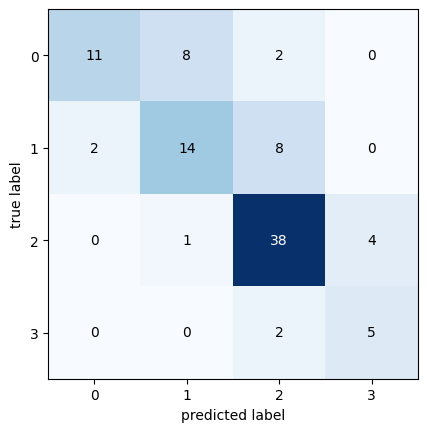

In [23]:
from torcheval.metrics.functional import multiclass_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

confmat = multiclass_confusion_matrix(input=torch.tensor(test_labels),
                                      target=torch.tensor(final_predictions),
                                      num_classes=4)
plot_confusion_matrix(conf_mat=confmat.cpu().numpy())
plt.show()


In [30]:
np.bincount(test_labels)

array([13, 23, 50,  9])

In [24]:
confmat.cpu().numpy()

array([[11,  8,  2,  0],
       [ 2, 14,  8,  0],
       [ 0,  1, 38,  4],
       [ 0,  0,  2,  5]])

In [ ]:
all_predictions

In [ ]:
for model in models_to_save:
    print(f"{len(list(model.classifier.parameters())) + len(list(model.features[7:].parameters()))}")

In [ ]:
len(model_b0_adam.features), len(model_b1_adam.features), len(model_b2_adam.features), len(model_b3_adam.features), len(model_b4_adam.features)

In [ ]:
len(list(model_b0_adam.features[7:].parameters())), len(list(model_b1_adam.features[7:].parameters())), len(list(model_b2_adam.features[7:].parameters())), len(list(model_b3_adam.features[7:].parameters())), len(list(model_b4_adam.features[7:].parameters()))

## with no training

In [ ]:
import numpy as np
import torch
from pathlib import Path
from src.models.models import get_efficientnet_b0_model, get_efficientnet_b1_model, get_efficientnet_b2_model, get_efficientnet_b3_model, get_efficientnet_b4_model
from src.preprocessing.transforms_data import data_transformations

train_dir = Path("data") / "Train_300x300"
test_dir = Path("data") / "Test_300x300"

model_b0_adam, model_b0_transforms = get_efficientnet_b0_model()
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b0_transforms)
train_dataloader, valid_dataloader, test_dataloader_b0 = data.get_dataloaders()

model_b1_adam, model_b1_transforms = get_efficientnet_b1_model()
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b1_transforms)
train_dataloader, valid_dataloader, test_dataloader_b1 = data.get_dataloaders()

model_b2_adam, model_b2_transforms =  get_efficientnet_b2_model()
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b2_transforms)
train_dataloader, valid_dataloader, test_dataloader_b2 = data.get_dataloaders()

model_b3_adam, model_b3_transforms = get_efficientnet_b3_model()
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b3_transforms)
train_dataloader, valid_dataloader, test_dataloader_b3 = data.get_dataloaders()

model_b4_adam, model_b4_transforms = get_efficientnet_b4_model()
data = data_transformations(train_dir=train_dir, test_dir=test_dir, model_transforms=model_b4_transforms)
train_dataloader, valid_dataloader, test_dataloader_b4 = data.get_dataloaders()


models = [model_b0_adam, model_b1_adam, model_b2_adam, model_b3_adam, model_b4_adam]
test_dataloaders = [test_dataloader_b0, test_dataloader_b1, test_dataloader_b2, test_dataloader_b3, test_dataloader_b4]

test_labels=[]
for X, y in test_dataloader_b0:
    test_labels.extend(y.cpu().numpy())
    
test_labels = np.array([x.item() for x in test_labels])


all_predictions = []
for model, test_loader in zip(models, test_dataloaders):
    model.to(device)
    model_predictions=[]
    model.eval()
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        with torch.no_grad():
            pred_logits = model(X)
            y_preds = torch.argmax(pred_logits, dim=1)
            model_predictions.extend(y_preds.cpu().numpy())
            
    all_predictions.append(model_predictions)

# Convert to numpy array for easier manipulation
# Shape will be (num_models, num_samples)
all_predictions = np.array(all_predictions)

# Step 3 & 4: Perform Majority Vote
# This finds the mode (most frequent value) for each column (each sample)
final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=all_predictions)

# # Step 5: Calculate Accuracy
correct_predictions = (final_predictions == test_labels).sum()
total_samples = len(test_labels)
ensemble_accuracy = correct_predictions / total_samples


print(f"Ensemble accuracy with majority vote: {ensemble_accuracy:.4f}")

In [ ]:
next(iter(test_dataloader_b0))[0][0].shape